# Init

In [125]:
!pip install yellowbrick

In [126]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [127]:
digits = load_digits()
x, y = digits.data, digits.target
labels = digits.target_names

In [128]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [130]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Clusterização K-Médias

N Clusters: 2 Avg: 0.10073495234153171
N Clusters: 3 Avg: 0.08928914344510806
N Clusters: 4 Avg: 0.09702251553197161
N Clusters: 5 Avg: 0.09734749197616502
N Clusters: 6 Avg: 0.09756314256120578
N Clusters: 7 Avg: 0.11645652773527786
N Clusters: 8 Avg: 0.12810377054070538
N Clusters: 9 Avg: 0.12643711324196627
N Clusters: 10 Avg: 0.12073227783170157
N Clusters: 11 Avg: 0.1373519330543896
N Clusters: 12 Avg: 0.1371900630232791
N Clusters: 13 Avg: 0.15016607491414605
N Clusters: 14 Avg: 0.1533497352726495
N Clusters: 15 Avg: 0.15563725948818624


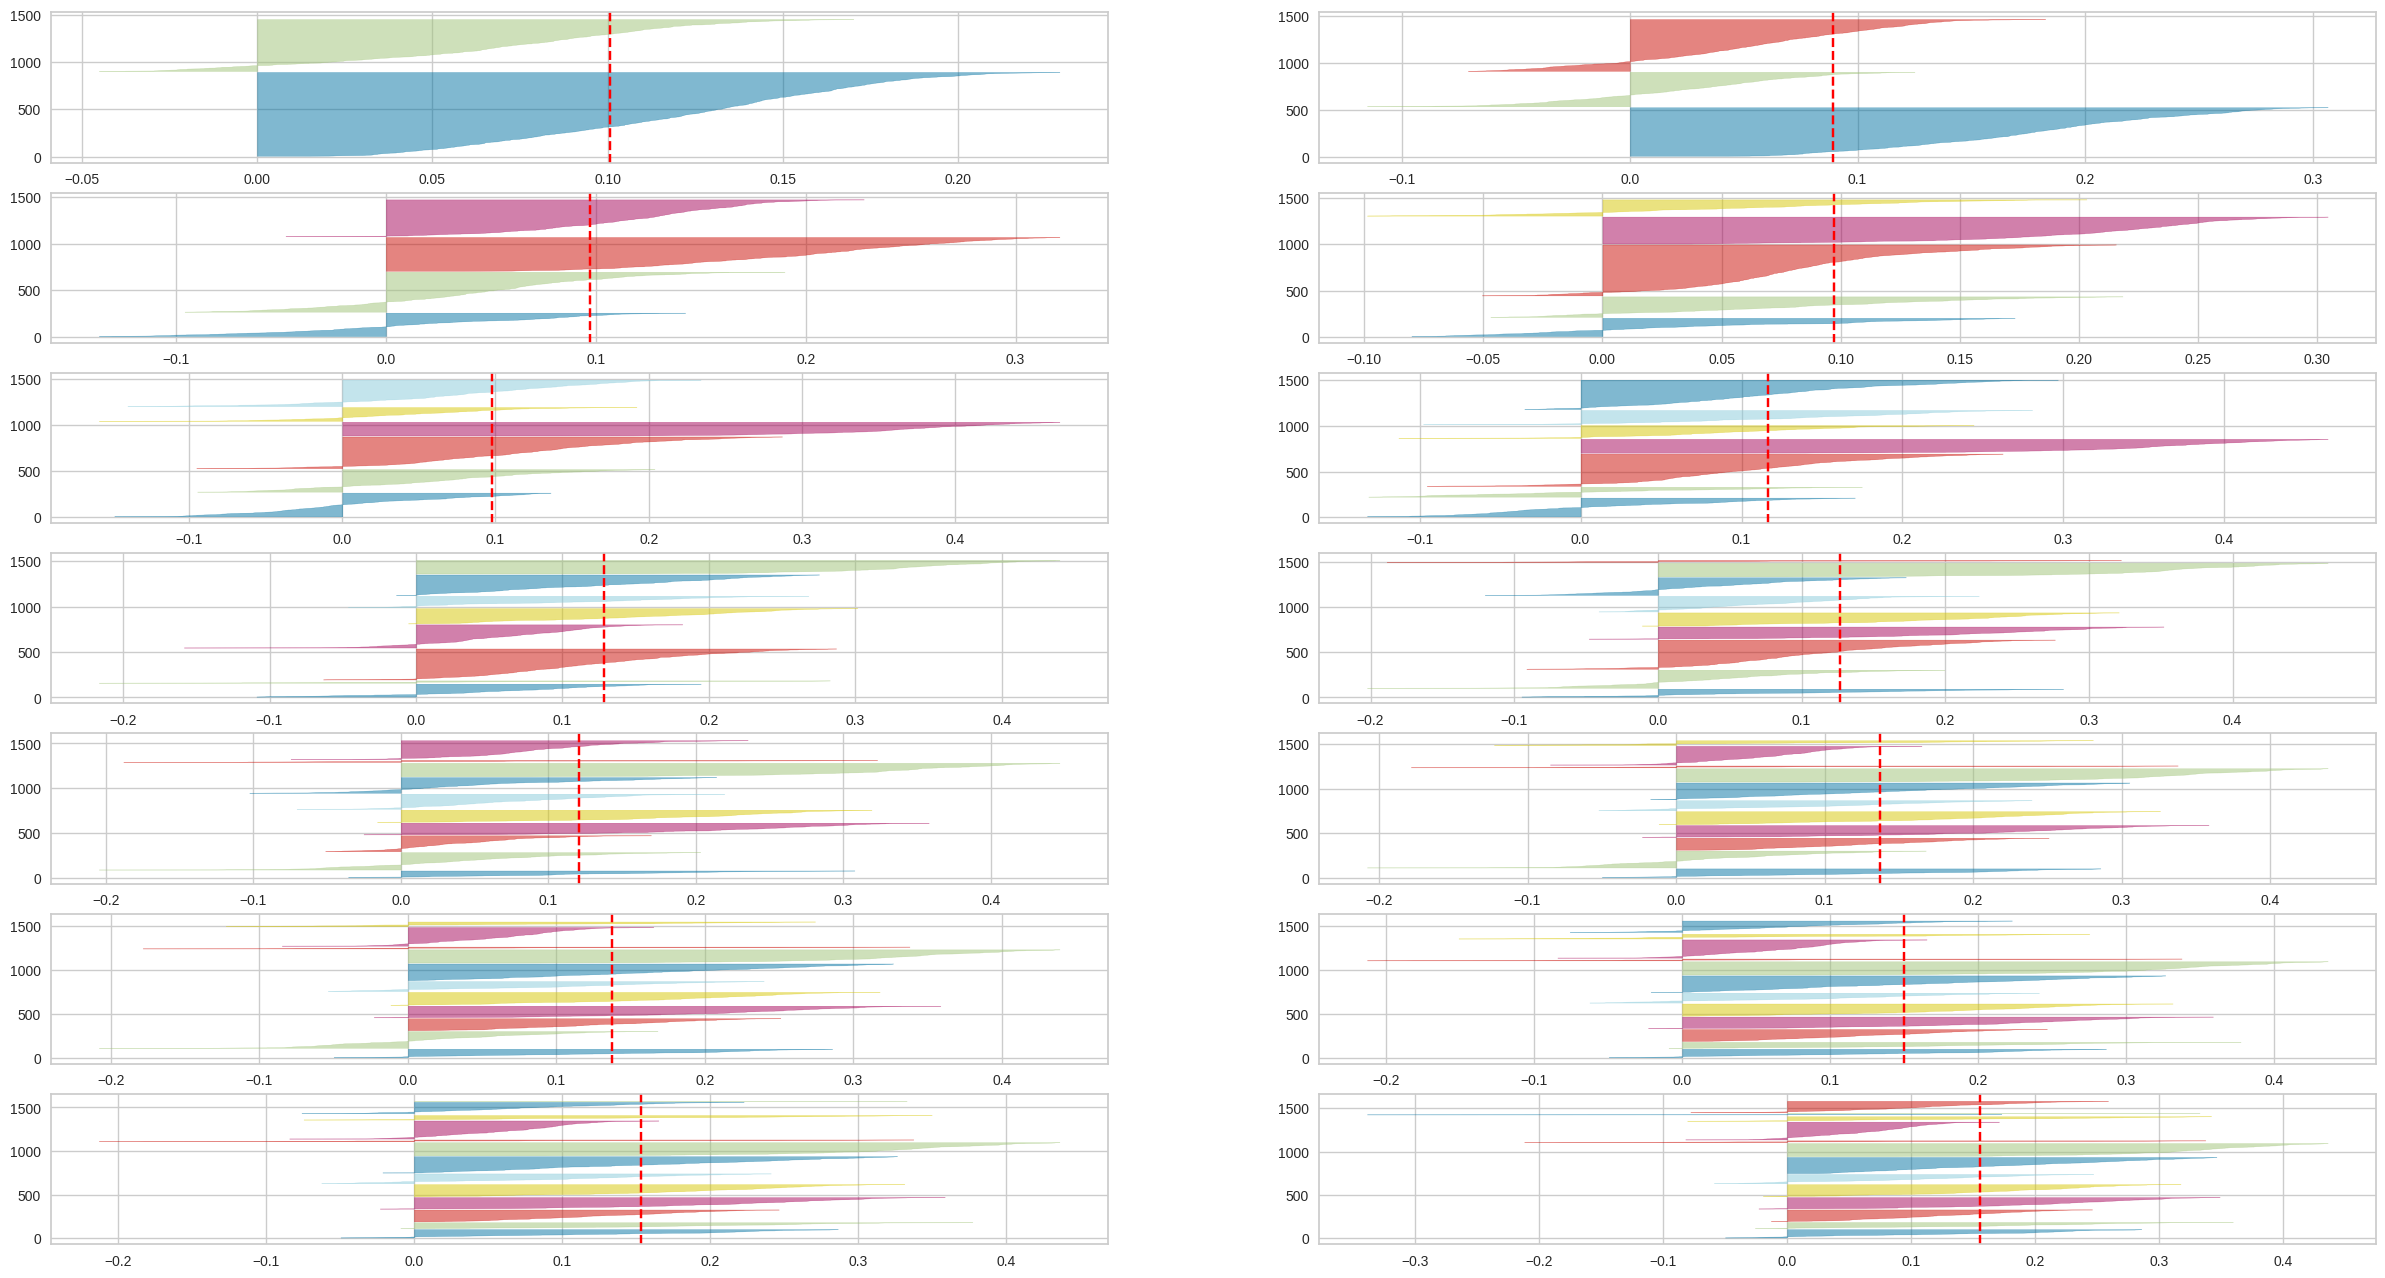

In [131]:
silhouette_scores, range_k = utils.visualize_silhouette(x_train, 15)

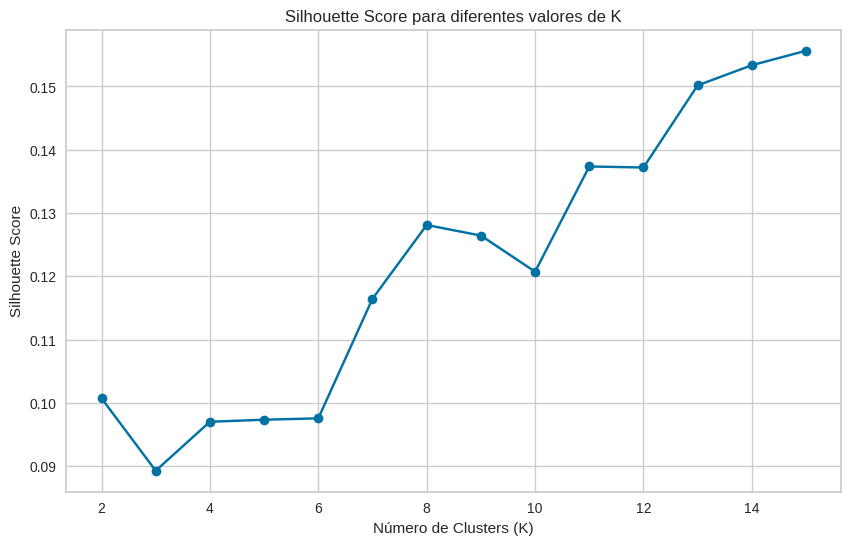

In [132]:
utils.visualize_sil_score_per_cluster(silhouette_scores, range_k)

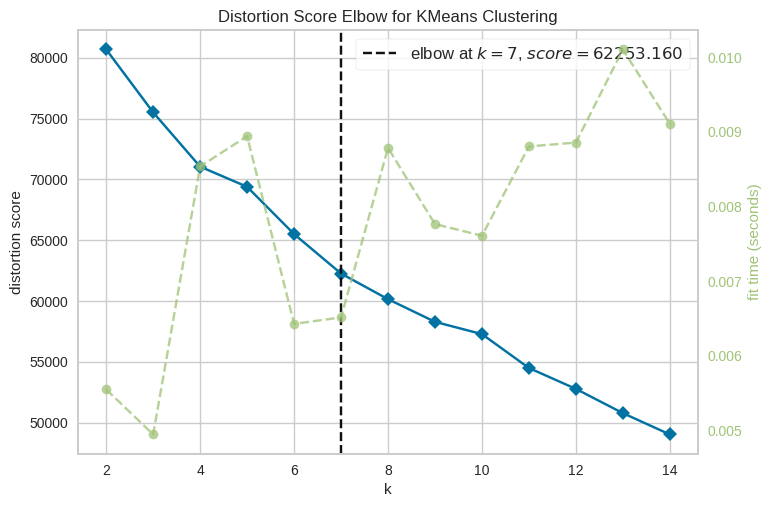

In [133]:
utils.visualize_elbow(x_train, 15)

# Criação de Features

In [134]:
n = 15

In [135]:
km = KMeans(n_clusters=n, random_state=0)
clusters = km.fit_predict(x_train)
centroids = km.cluster_centers_

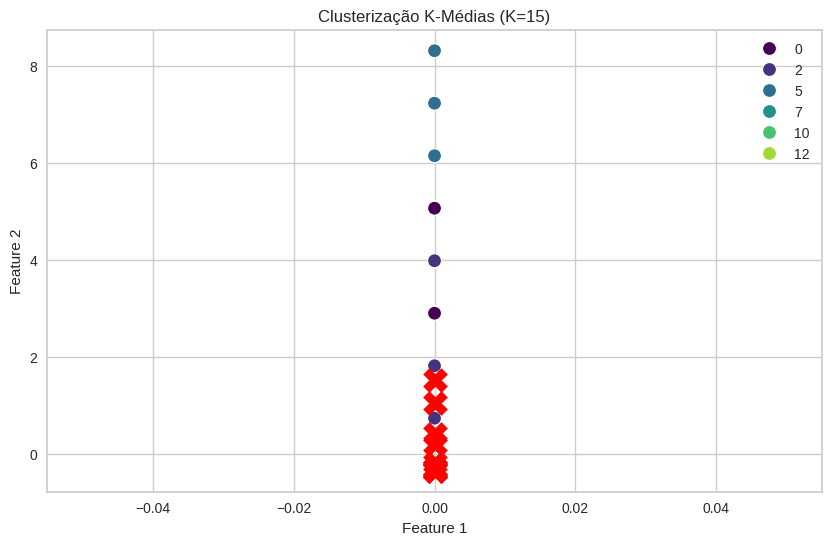

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"Clusterização K-Médias (K={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [137]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, centroids)

In [138]:
x_train_mod

,0,1,2,3,4,5,6,7,8,9,...,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0.0,-0.337904,-1.091416,-0.649132,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,-0.626063,...,12.627949,11.217658,12.019149,17.673587,11.950510,8.554002,43.138641,24.654517,31.569387,11.510621
1,0.0,2.906429,1.416964,0.050295,0.500004,-0.325317,-0.407648,-0.122381,-0.055763,-0.311829,...,7.775508,9.654678,8.760892,15.931210,6.088087,10.276056,42.657241,24.498839,30.684113,10.548362
2,0.0,0.743540,0.998901,0.749722,0.969615,1.262951,0.499616,-0.122381,-0.055763,0.945108,...,8.151573,9.312552,8.799571,13.981285,6.868282,11.041917,42.512091,24.381438,31.081587,10.334881
3,0.0,-0.337904,-1.091416,0.050295,-1.848053,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,8.300429,7.684987,7.869187,13.375660,8.181806,10.188944,42.399475,22.868108,30.967449,5.288663
4,0.0,-0.337904,-1.091416,-0.649132,0.969615,-0.501791,-0.407648,-0.122381,-0.055763,-0.626063,...,8.814560,8.542051,7.339917,13.511364,8.796200,11.274343,42.516537,22.486004,31.053583,4.673825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.743540,0.580838,0.516580,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,7.310502,6.209779,8.754506,15.260270,6.317313,9.309737,41.574687,23.551500,30.321091,9.312858
1433,0.0,1.824985,0.789869,0.749722,0.969615,1.615900,0.197195,-0.122381,-0.055763,2.830513,...,9.219269,10.125273,8.586870,15.709354,6.551407,11.199844,42.710312,24.737202,30.886796,11.269457
1434,0.0,-0.337904,-0.046258,0.516580,0.500004,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,8.338670,6.099009,8.629373,14.531907,8.211539,10.360969,42.143921,23.354189,30.669445,7.797327
1435,0.0,-0.337904,-0.255289,-0.415990,0.734809,1.792374,0.802037,-0.122381,-0.055763,-0.626063,...,7.762037,6.681932,8.347891,13.580069,7.879636,10.665454,42.032890,23.259319,30.902803,7.357165


In [139]:
x_test_mod

,0,1,2,3,4,5,6,7,8,9,...,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0.0,-0.337904,1.207933,0.982865,0.734809,-0.501791,-0.407648,-0.122381,-0.055763,0.945108,...,9.297966,8.909931,10.146574,16.117796,8.787494,6.119931,42.355034,24.833491,30.339764,11.307706
1,0.0,0.743540,2.044059,0.516580,-2.317664,-1.031214,-0.407648,-0.122381,-0.055763,1.259342,...,7.657242,7.986514,9.781996,15.521672,8.313676,10.362330,42.250583,24.204101,30.809704,9.998825
2,0.0,1.824985,1.625996,0.982865,-0.439219,-1.031214,-0.407648,-0.122381,-0.055763,3.144747,...,8.948494,8.955036,10.889270,16.977073,8.881839,7.761612,42.333184,24.993897,29.785989,11.956185
3,0.0,-0.337904,0.789869,-1.115417,-2.787275,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,9.353979,8.875615,8.137536,15.843002,8.267241,10.336625,42.265597,23.028604,31.078266,8.177243
4,0.0,-0.337904,-0.464321,0.283438,-1.378441,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,8.438462,7.816407,6.766535,15.178869,7.287110,9.701567,42.380529,23.179030,30.697912,7.465297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,-0.337904,-0.464321,-0.882274,-0.204413,1.262951,3.826249,-0.122381,-0.055763,0.002405,...,6.788073,7.557279,8.739321,13.037324,8.350841,10.890326,42.221120,23.844666,30.806266,8.722038
356,0.0,-0.337904,-1.091416,-0.649132,-0.204413,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,8.499623,7.187567,7.322681,13.842591,8.173359,10.421306,42.110495,22.319974,30.863241,4.374504
357,0.0,0.743540,0.789869,0.982865,0.969615,1.086477,-0.105227,-0.122381,-0.055763,-0.626063,...,7.020459,6.099711,8.999156,13.892047,7.199964,9.904466,42.174301,24.051588,30.547132,9.294445
358,0.0,-0.337904,-1.091416,-2.047986,0.500004,1.262951,0.499616,-0.122381,-0.055763,-0.626063,...,9.792849,6.907094,8.905070,13.745767,7.753472,10.502389,41.935240,23.120087,30.908554,8.059665


# SVM

## Modelo de ML

In [140]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

### Dataset Original

In [141]:
svc_ori = SVC(probability=True)

In [142]:
grid_ori = GridSearchCV(estimator=svc_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [143]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

### Dataset Modificado

In [144]:
svc_mod = SVC(probability=True)

In [145]:
grid_mod = GridSearchCV(estimator=svc_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [146]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [147]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Score GridSearch: 0.9861111111111112

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      0.97      0.97        39
           8       0.95      1.00      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



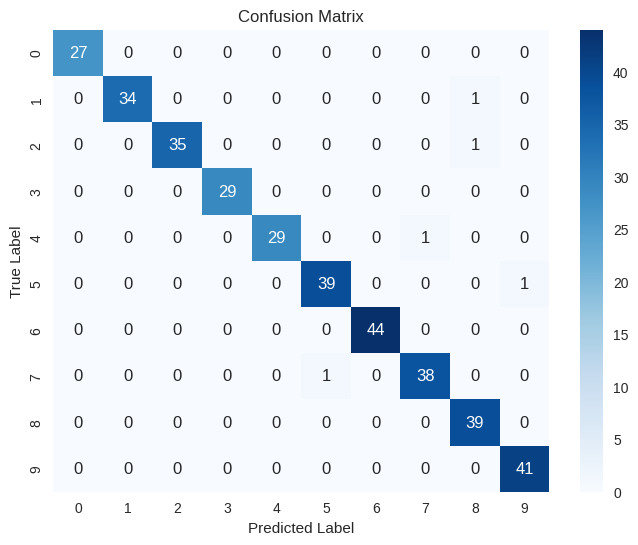

In [148]:
utils.show_cm(y_test, y_pred, labels)

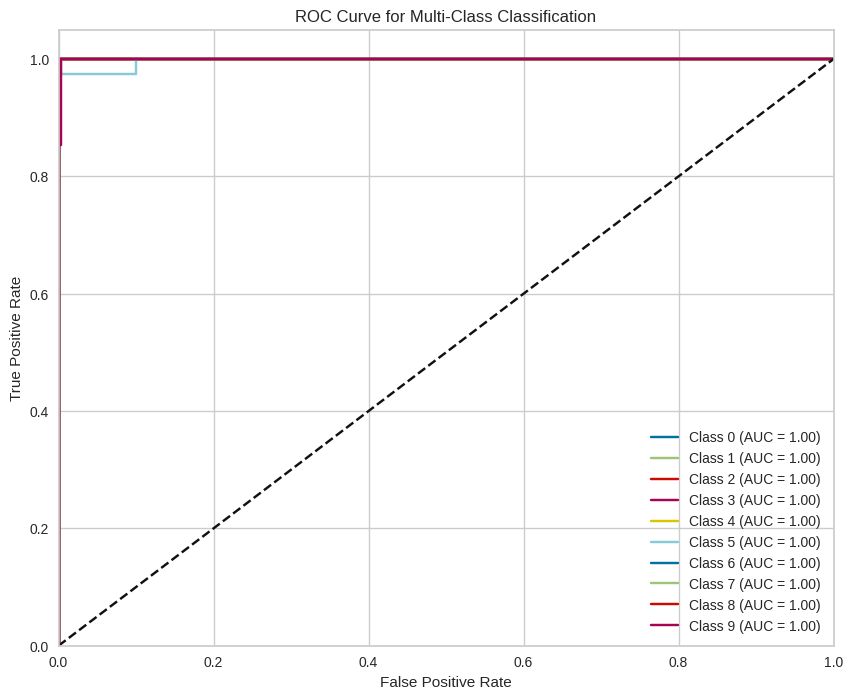

In [149]:
n_classes = 10

y_train_bin = label_binarize(y_train, classes=range(n_classes))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [150]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Score GridSearch: 0.9722222222222222

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.95      1.00      0.97        36
           3       1.00      0.97      0.98        29
           4       0.88      1.00      0.94        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       1.00      0.92      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



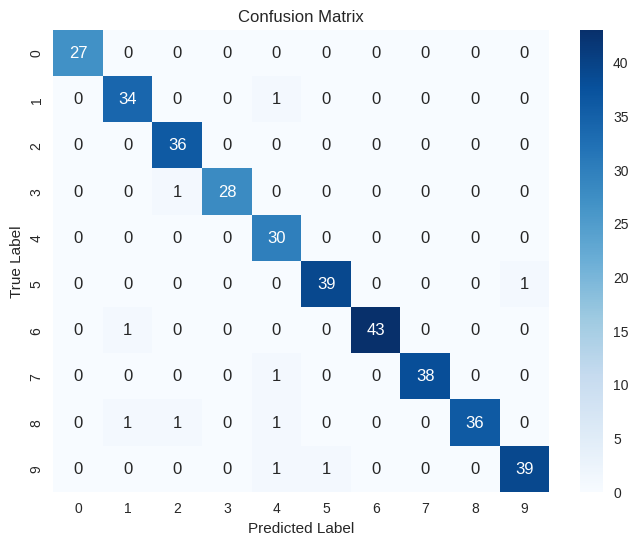

In [151]:
utils.show_cm(y_test, y_pred, labels)

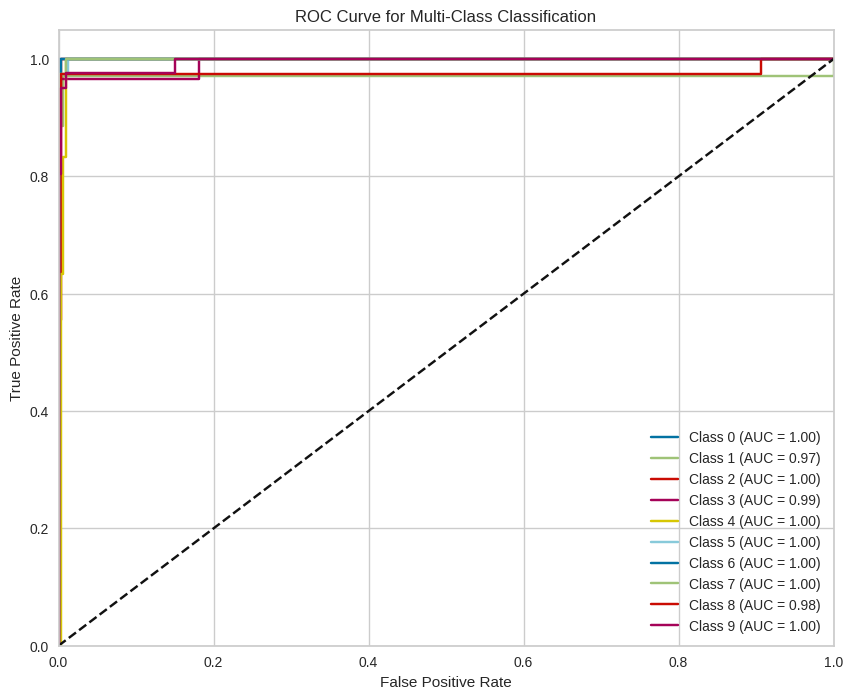

In [152]:
n_classes = 10

y_train_bin = label_binarize(y_train, classes=range(n_classes))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

# Random Forest

## Modelo de ML

In [153]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

### Dataset Original

In [154]:
rf_ori = RandomForestClassifier()

In [155]:
grid_ori = GridSearchCV(estimator=rf_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [156]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

### Dataset Modificado

In [157]:
rf_mod = RandomForestClassifier()

In [158]:
grid_mod = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [159]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [160]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
Score GridSearch: 0.9694444444444444

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00        35
           2       1.00      0.92      0.96        36
           3       0.88      1.00      0.94        29
           4       1.00      0.97      0.98        30
           5       0.95      0.95      0.95        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.97      0.99        39
           9       0.95      0.90      0.93        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



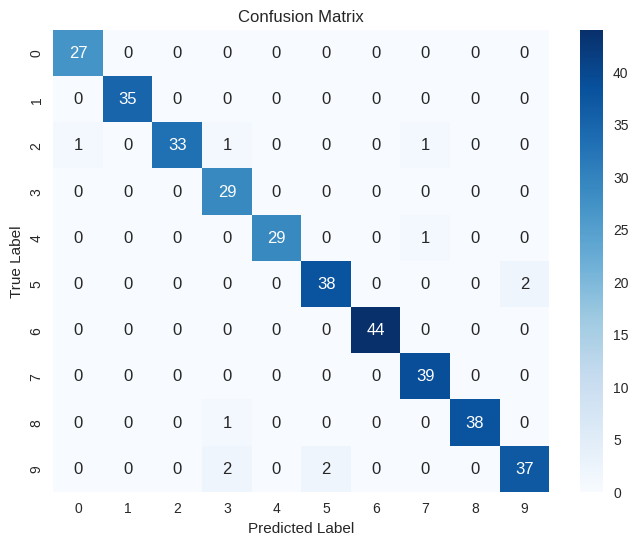

In [161]:
utils.show_cm(y_test, y_pred, labels)

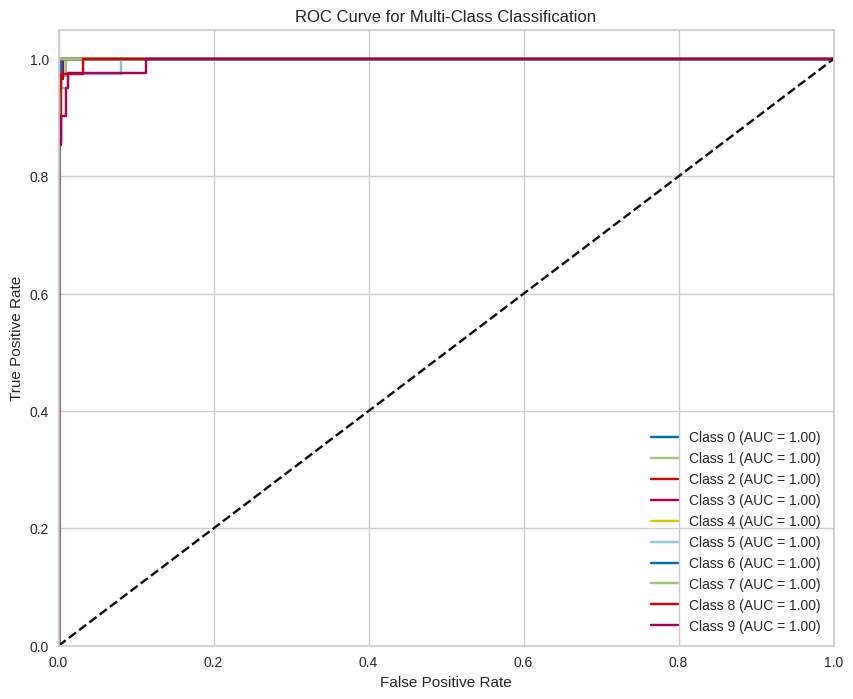

In [162]:
n_classes = 10

y_train_bin = label_binarize(y_train, classes=range(n_classes))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [163]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Score GridSearch: 0.9694444444444444

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       1.00      1.00      1.00        36
           3       0.94      1.00      0.97        29
           4       0.97      0.97      0.97        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       0.95      0.97      0.96        39
           8       1.00      0.90      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



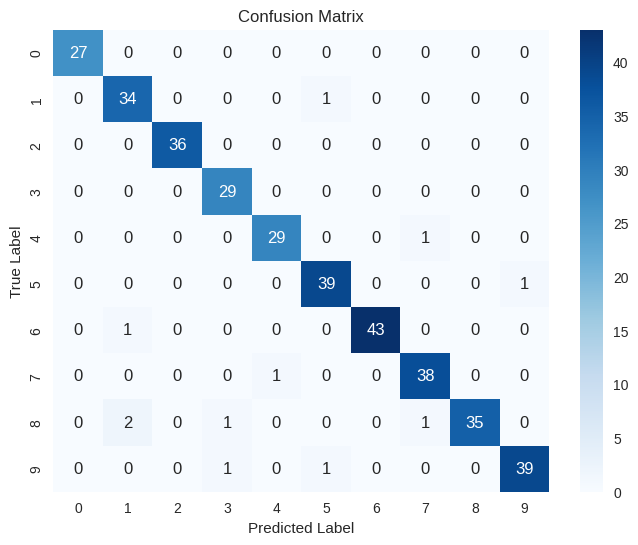

In [164]:
utils.show_cm(y_test, y_pred, labels)

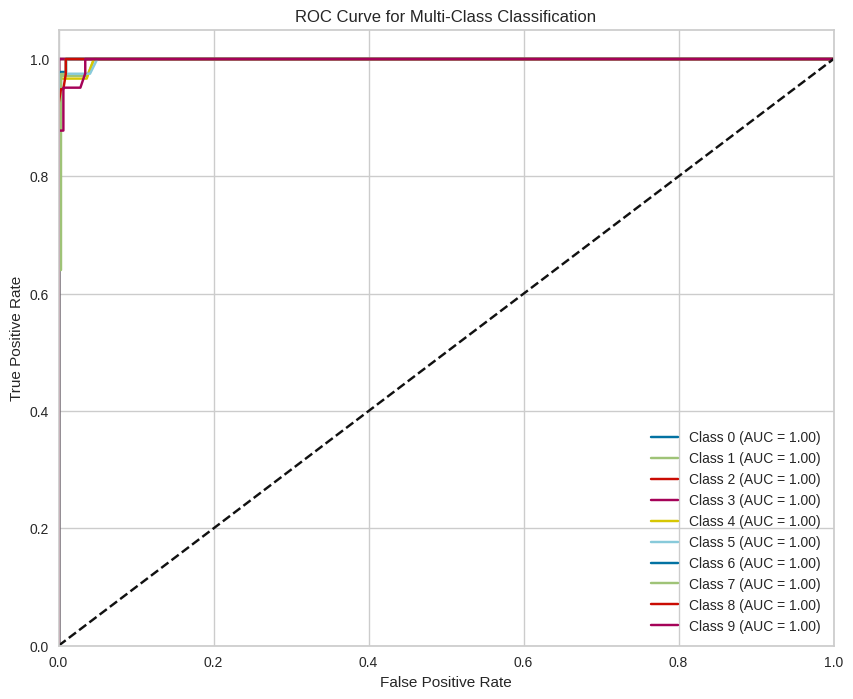

In [165]:
n_classes = 10

y_train_bin = label_binarize(y_train, classes=range(n_classes))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()